# Dengue Analysis
...
---

### Understanding
- **The problem**
- **The solution**

---

### Objective
- **What to Deliver**
- **Solution Planning**
- **Dataset Overview**

---

## 0. Imports

### 0.1. Libraries

In [1]:
# Data manipulation libraries
import pandas               as pd
import numpy                as np

# Visualization libraries
import seaborn              as sns
import matplotlib           as mpl
import matplotlib.pyplot    as plt

from matplotlib             import cm
from matplotlib.colors      import Normalize

# import plotly.express       as px
# import plotly.graph_objects as go

# Geo libraries
import geopandas            as gpd

# Other
import warnings
import sys
import os

### 0.2. Settings

In [73]:
# Ignoring warnings
warnings.filterwarnings('ignore')

# Pandas Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Directory Settings
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
src_path     = os.path.join(project_root, 'src')
sys.path.append(src_path)

# Visualization Settings
%matplotlib inline

# Set a style
mpl.style.use('ggplot')  

# Customize rcParams
mpl.rcParams.update({
    'axes.titlesize': 24,
    'axes.labelsize': 16,
    'axes.facecolor': 'white',
    'axes.linewidth': 1,
    'axes.grid': True,
    'xtick.labelsize': 14,
    'xtick.color': 'black',
    'ytick.labelsize': 14,
    'ytick.color': 'black',
    'legend.fontsize': 12,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'grid.color': 'lightgray',
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,
    'font.size': 12,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'figure.titlesize': 24,
    'figure.figsize': (18, 9),
    'figure.dpi': 150
})

### 0.3. Functions

In [31]:
def set_plot(fig, title, xlabel, ylabel):
    """
    Summary: This function sets the plot configuration for the initial plots. 
    Args:
        fig: the figure object.
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
    Returns: figure with the image configuration.
    """
    # Customizing
    fig.set_title(title)
    fig.set_xlabel(xlabel, color='black')
    fig.set_ylabel(ylabel, color='black')
    fig.tick_params(left=False, bottom=False)

    return fig

### 0.4. Classes

In [3]:
from data_processing.data_processing import CasosDengueUF20012006, CasosDengueUF20072013, CasosDengueUF20142023
from data_processing.data_processing import ObitosDengueUF20012006, ObitosDengueUF20072013, ObitosDengueUF20142023

### 0.5. Datasets

In [4]:
# Casos de dengue em 2003 a 2006
df_casos_06 = CasosDengueUF20012006().process_data()

# Casos de dengue em 2007 a 2013
df_casos_13 = CasosDengueUF20072013().process_data()

# Casos de dengue em 2014 a 2023
df_casos_23 = CasosDengueUF20142023().process_data()

# Concatenando os dataframes
df_concat1  = pd.concat([df_casos_06, df_casos_13, df_casos_23], ignore_index=True)

# Somando casos duplicados de 2013
df_casos_uf = df_concat1.groupby(['nome_uf', 'id_uf', 'ano']).sum().reset_index()

In [5]:
# Óbitos de dengue em 2003 a 2006
df_obitos_06 = ObitosDengueUF20012006().process_data()

# Óbitos de dengue em 2007 a 2013
df_obitos_13 = ObitosDengueUF20072013().process_data()

# Óbitos de dengue em 2014 a 2023
df_obitos_23 = ObitosDengueUF20142023().process_data()

# Concatenando os dataframes
df_concat2   = pd.concat([df_obitos_06, df_obitos_13, df_obitos_23], ignore_index=True)

# Somando casos duplicados de 2013
df_obitos_uf = df_concat2.groupby(['nome_uf', 'id_uf', 'ano']).sum().reset_index()

In [6]:
# População
df_pop_uf = pd.read_csv('../data/interim/uf_populacao.csv')

In [7]:
# GeoDataFrame UF Brasil
gdf_uf = gpd.read_file('../data/interim/uf_brasil.geojson')

## 1. Data Preparation

In [22]:
nome_alb = ['Acre', 'Amapá', 'Amazonas', 'Maranhão', 'Mato Grosso', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']

## 2. Data Exploration

In [8]:
df_casos_uf

,nome_uf,id_uf,ano,casos
0,Acre,12,2003,970
1,Acre,12,2004,4679
2,Acre,12,2005,2280
3,Acre,12,2006,265
4,Acre,12,2007,521
...,...,...,...,...
562,Tocantins,17,2019,13727
563,Tocantins,17,2020,1916
564,Tocantins,17,2021,9523
565,Tocantins,17,2022,20757


In [9]:
df_obitos_uf

,nome_uf,id_uf,ano,obitos
0,Acre,12,2003,0
1,Acre,12,2004,2
2,Acre,12,2005,0
3,Acre,12,2006,1
4,Acre,12,2007,0
...,...,...,...,...
547,Tocantins,17,2019,10
548,Tocantins,17,2020,0
549,Tocantins,17,2021,6
550,Tocantins,17,2022,8


## 3. Data Statistics

### 3.1. Casos de Dengue por UF no Brasil e na Amazônia Legal Brasileira nos últimos 10 anos 

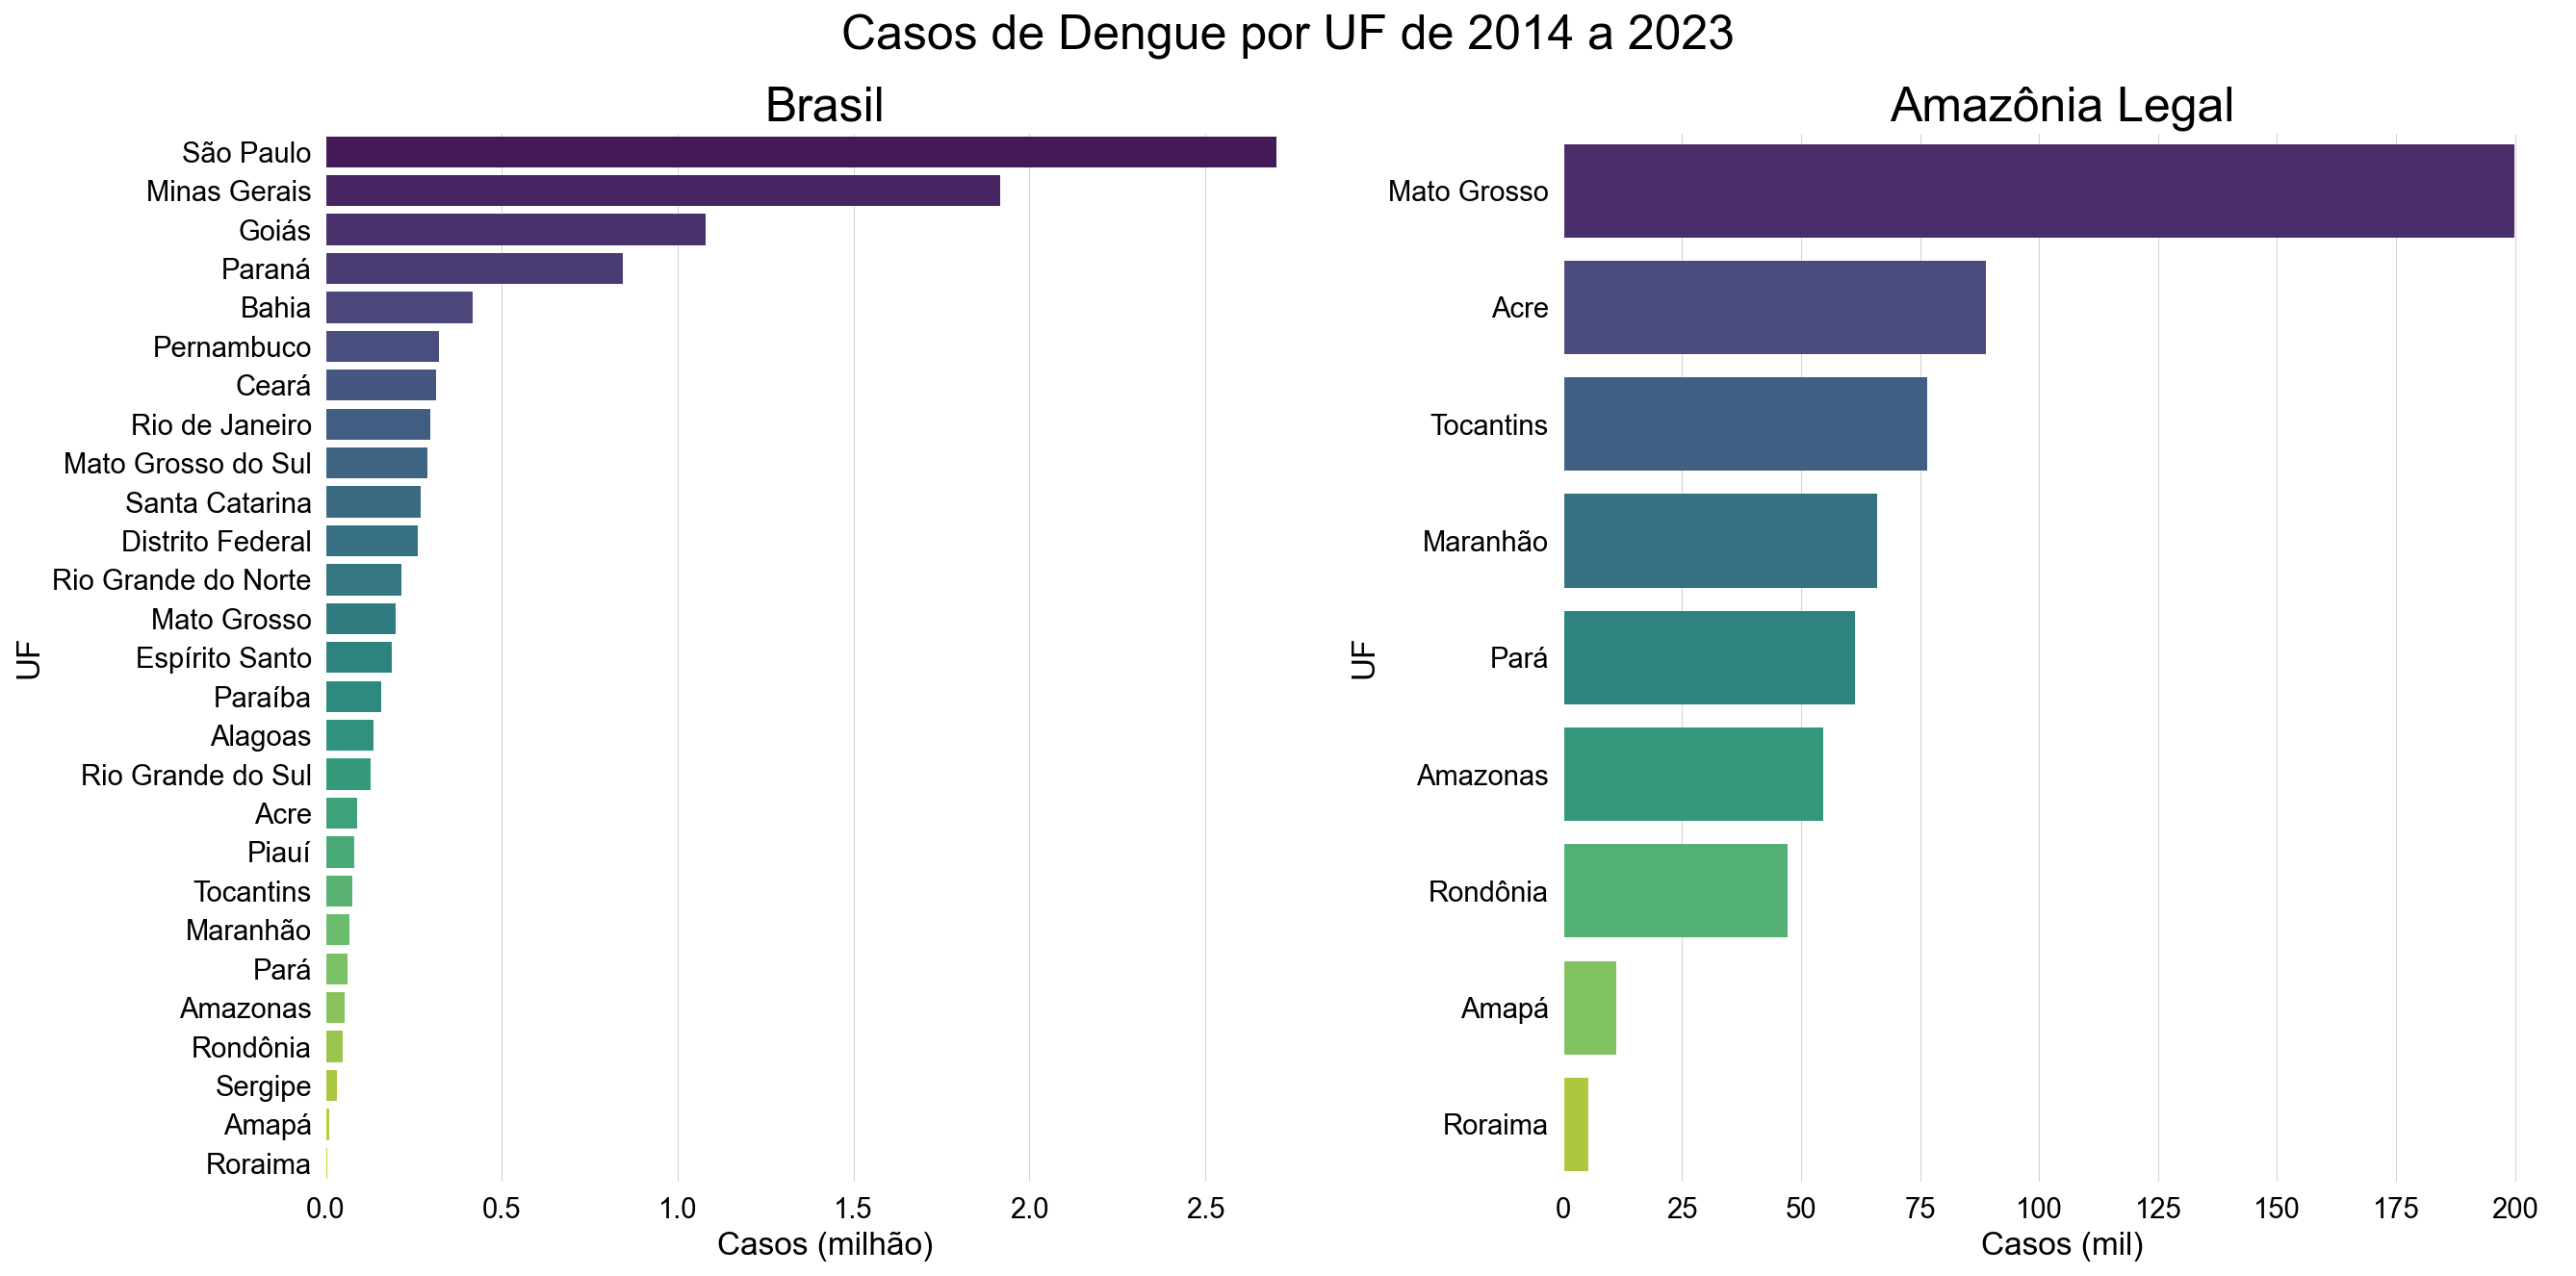

In [74]:
# Data manipulation
aux1 = df_casos_uf[df_casos_uf['ano'].isin(range(2014, 2024))].groupby(['nome_uf'])\
            .sum().reset_index().sort_values(by='casos', ascending=False)
aux2 = aux1[aux1['nome_uf'].isin(nome_alb)]

aux1['casos'] = aux1['casos'] / 1000000
aux2['casos'] = aux2['casos'] / 1000

# Figure
fig, axes = plt.subplots(1, 2)

ax1 = sns.barplot(data=aux1, x='casos', y='nome_uf', palette='viridis', ax=axes[0])
ax1 = set_plot(ax1, 'Brasil', 'Casos (milhão)', 'UF')

ax2 = sns.barplot(data=aux2, x='casos', y='nome_uf', palette='viridis', ax=axes[1])
ax2 = set_plot(ax2, 'Amazônia Legal', 'Casos (mil)', 'UF')

plt.suptitle('Casos de Dengue por UF de 2014 a 2023')
plt.tight_layout()

### 3.2. Estados com mais e menos óbitos por agravamento de dengue nos últimos 10 anos

### 3.3. Taxa de Incidência (x100.000 hab.) de dengue nos estados brasileiros

### 3.4. Taxa de Letalidade (%) de dengue nos estados brasileiros

### 3.5. Evolução da Taxa de Incidência ao longo dos períodos

### 3.6. Evolução da Taxa de Letalidade ao longo dos períodos

## 4. Data Visualization

### Avaliação da Taxa de Incidência entre estados da Amazônia Legal Brasileira (ALB)

### Comparação da Taxa de Incidência em estados da ALB e outros estados

### Avaliação da Taxa de Letalidade entre estados da ALB

### Avaliação da Taxa de Letalidade em estados da ALB e outros estados

In [ ]:
# Juntar os dados de casos de dengue com os dados geográficos dos estados
gdf_uf_casos = pd.merge(gdf_uf, df_casos[df_casos['ano'] == 2023].groupby(['id_uf']).sum().reset_index(), on=['id_uf'])

# Quantiles
quantiles = gdf_uf_casos['casos'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])
quantile_bins = [quantiles.iloc[i] for i in range(6)]

cmap = cm.get_cmap('Oranges')

# Normalizando dados com Normalize do matplotlib
norm = Normalize(vmin=gdf_uf_casos['casos'].min(), vmax=gdf_uf_casos['casos'].max())

# Figura
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot
gdf_uf_casos.plot(column='casos', ax=ax, cmap=cmap, linewidth=0.3, edgecolor='black', scheme='quantiles', k=5)

# Barra de cores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical')

plt.title('Casos de Dengue em 2023')
plt.xlim(-75, -30)
plt.tick_params(left=False, bottom=False)